<a href="https://colab.research.google.com/github/Renan-LS/Case_Data_Analyst/blob/main/Case_Data_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Teste Técnico - Vaga Analista de dados -

###**OBJETIVO:**
#### O trabalho corrente tem como objetivo o tratamento de uma base de dados chamada "Arquivo_limpar.csv". Nela contém uma estrutura de dados bidimensional que possui os seguintes campos:
- Cod cliente: Trata-se do código de cada cliente
- Nome: Refere-se ao nome de cada cliente
- DocId (11 digitos): Trata-se de um Id de identificação de cada cliente.
- endereco: Atributo que guarda o endereço de cada cliente. Pode possuir sub-divisões como tipo de logradouro, nome do logradouro, numero e complemento.
- seq: campo único que representa cada registro contido na estrutura

O artefato final deste trabalho é um arquivo .csv que contenha uma base de dados tratada de acordo com as Tarefas 1,2 e 3.



###**Desenvolvimento e metodologia**
#### Tarefa 1 - limpar/normalizar:
####Separar o endereço criando novos campos: TIPO_LOGRADOURO, NOME_LOGRADOURO, NUMERO e COMPLEMENTO


**OBS:** *No campo NUMERO deverá conter apenas dados de tipo numéricos, outras informações deverão ser colocadas no campo COMPLEMENTO.*

Comentários:

1 - A primeira tarefa a ser realizada foi a extração dos dados do arquivo chamado "Arquivo_limpar.csv" e posterior carregamento em uma estrutura chamada *df* que é um dataframe do Pandas, que é uma estrutura de dados bidimensional, semelhante a uma tabela ou planilha, que permite armazenar e manipular dados de forma eficiente.


In [ ]:
# Realizada as importações de bibliotecas e módulos necessários
import pandas as pd
import re
import numpy as np

# Ler o arquivo CSV com o codec 'latin-1'
df = pd.read_csv('/content/Arquivo_limpar.csv', sep=';', encoding='latin-1')
df.head()

,Cod Cliente,Nome,DocId (11 digitos),endereco,seq
0,CC000001,Cliente 1,555,"RUA 10 DE MAIO, 101 - tt",1
1,CC001124,Cliente 1124,1623,"Rua Eudoria Xavier da Silva, 3231 - casa",2
2,CC007704,Cliente 7704,79261,"RUA PRINCIPAL, 2 - CONGONHAL",3
3,CC007727,Cliente 7727,79284,"BRAZILIANO BRANDAO , 70 -",4
4,CC000001,Cliente 1,3558,"RUA ISMENEA MARIA DOS SANTOS , 445 -",5


2 - De posse da estrutura de dados em um Dataframe, agora podemos inicializar as manipulações de dados. O primeiro passo foi definir uma função chamada *process_address* que tem como parâmetros de entrada um "endereco".

A função realiza as seguintes etapas de processamento:

1. Converte o endereço para minúsculas e remove espaços em branco no
início e no final.
2. Aplica substituições no endereço para padronizar os tipos de logradouros, utilizando um dicionário de substituições.
3. Divide o endereço em duas partes: tipo de logradouro e nome do logradouro.
4. Verifica o tipo de logradouro com base em palavras-chave pré-definidas e separa o nome do logradouro.
5. Se o tipo de logradouro não for encontrado, define o tipo como "logradouro inexistente" e atribui o endereço completo ao nome do logradouro.
6. Divide o nome do logradouro em duas partes: número e complemento.
7. Trata o campo "NUMERO" para permitir apenas números, removendo todos os caracteres não numéricos.
8. Retorna os valores processados do endereço como uma tupla contendo o tipo de logradouro, nome do logradouro, número e complemento.

Definida a função explicitada acima, é aplicado sob todo dataframe *df* sob a coluna endereco, resultando em um df com uma nova estrutura com 4 colunas adicionais, são elas: TIPO_LOGRADOURO, NOME_LOGRADOURO, NUMERO E COMPLEMENTO

**PS:** Segue lista com os tipos de logradouros que foram considerados.(aeroporto, alameda, área, area, avenida, campo, chácara, chacara, colônia, colonia, condomínio, condominio, distrito, esplanada, estrada, feira, jardim, largo, loteamento, núcleo, nucleo, passarela, pátio, patio, praça, quadra, recanto, residencial, rua, setor, sítio, sitio, travessa, trecho, trevo, via, vereda, viela, vila)

**PS2:** Estruturas de endereços que não possuiam quaisquer tipo de logradouro dentre os listados acima, foram setadas com o TIPO_LOGRADOURO = "logradouro inexistente". Foi uma atitude tomada pelo analista responsável, mas que poderia ser facilmente mudada, se necessário.

In [ ]:
# Função para processar o endereço
def process_address(endereco):
    # Converte o endereço para minúsculas e remove espaços em branco no início e no final
    string = endereco.lower().strip()

    # Dicionário de substituições para padronizar os tipos de logradouros
    replacements = {
        "r.": "rua ",
        "r:": "rua ",
        "rua:": "rua ",
        "rau:": "rua ",
        "ria ": "rua ",
        "av.": "avenida ",
        "av:": "avenida ",
        "rod.": "rodovia ",
        "rod ": "rodovia ",
        "av ": "avenida ",
        "r ": "rua ",
        "ru ": "rua ",
        "ru:": "rua ",
        "rod ": "rodovia ",
        "rdv ": "rodovia ",
        "trav ": "travessa ",
        "est ": "estrada ",
        "pça ": "praça ",
        "praca": "praça ",
        "tv.": "travessa ",
        "tv ": "travessa "
    }

    # Aplica as substituições ao endereço
    for old, new in replacements.items():
        string = string.replace(old, new)

    # Divide o endereço em duas partes: tipo de logradouro e nome do logradouro
    parts = string.split(' ', 1)
    TIPO_LOGRADOURO = None
    for word in ["aeroporto", "alameda", "área", "area", "avenida", "campo", "chácara", "chacara", "colônia", "colonia", "condomínio", "condominio", "distrito", "esplanada", "estrada", "feira", "jardim", "largo", "loteamento", "núcleo", "nucleo", "passarela", "pátio", "patio", "praça", "quadra", "recanto", "residencial", "rua", "setor", "sítio", "sitio", "travessa", "trecho", "trevo", "via", "vereda", "viela", "vila"]:
        if parts[0].find(word) != -1:
            TIPO_LOGRADOURO = word
            NOME_LOGRADOURO = parts[1]
            break
    # Se o tipo de logradouro não foi encontrado, define como "LOGRADOURO INEXISTENTE"
    if TIPO_LOGRADOURO is None:
        TIPO_LOGRADOURO = "logradouro inexistente"
        NOME_LOGRADOURO = string

    # Divide o nome do logradouro em duas partes: número e complemento
    parts = NOME_LOGRADOURO.split(', ')
    NOME_LOGRADOURO = parts[0]
    if len(parts) > 1:
        parts = parts[1].split(' - ')
        NUMERO = parts[0]
        if len(parts) > 1:
            COMPLEMENTO = parts[1]
        else:
            COMPLEMENTO = None
    else:
        NUMERO = None
        COMPLEMENTO = None

    # Tratamento para permitir apenas números no campo "NUMERO"
    if NUMERO is not None:
        NUMERO = re.sub(r'\D', '', NUMERO)  # Remove todos os caracteres não numéricos

    # Retorna os valores processados do endereço
    return (
        TIPO_LOGRADOURO.strip() if TIPO_LOGRADOURO is not None else None,
        NOME_LOGRADOURO.strip() if NOME_LOGRADOURO is not None else None,
        NUMERO.strip() if NUMERO is not None else None,
        COMPLEMENTO.strip() if COMPLEMENTO is not None else None
    )

# Aplica a função de processamento do endereço à coluna "endereco" do DataFrame
df[['TIPO_LOGRADOURO', 'NOME_LOGRADOURO', 'NUMERO', 'COMPLEMENTO']] = df['endereco'].apply(process_address).apply(pd.Series)


In [ ]:
df.to_excel('/content/Arquivo_tarefa1.xlsx', index=False)

### Tarefa 2 - juntar endereços utilizando o DocId
#### Identificar os Clientes com mesmo Codigo e DocId colocar na mesma linha os endereços encontrados.
#### OBS: *Podem ser criados novos campos: (TIPO_LOGRADOURO_1, NOME_LOGRADOURO_1, NUMERO_1, COMPLEMENTO_1; TIPO_LOGRADOURO_2, NOME_LOGRADOURO_2, NUMERO_2, COMPLEMENTO_2; ... ;TIPO_LOGRADOURO_N, NOME_LOGRADOURO_N, NUMERO_N, COMPLEMENTO_N;)*

Comentários:

4 - O objetivo desta tarefa, é realizar uma espécie de "merge" de endereços, obviamente que já separados de acordo com a tarefa anterior, respeitando a regra de aplicação do "merge" que afirma que os clientes com mesmo *Cod Cliente* e *DocId (11 digitos)*, devem possuir na mesma linha, os endereços encontrados.

A maneira com a qual o Analista escolheu para organizar estes endereços foi um pouco distinta da sugerida. Ao invés de criar campos para cada endereço encontrado, foi aproveitado os atributos que já estão criados e foi agrupado os dados separados por um *pipe* "|". Acredito que dessa maneira o dataset fica menos poluído. Segue exemplo.

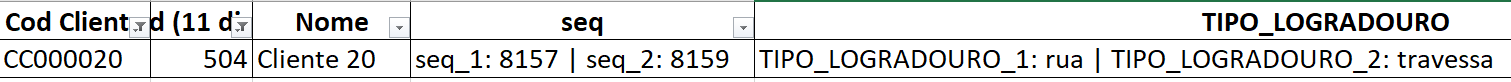

PS: De modo a manter o dataset o mais limpo e organizado possível, foi eliminado o atributo endereco, uma vez que todas as informações contidas nele já estam devidamente separadas e organizadas nos atributos TIPO_LOGRADOURO,NOME_LOGRADOURO,NUMERO e COMPLEMENTO

In [ ]:
# Define uma função para adicionar rótulos aos valores das colunas 'seq', 'TIPO_LOGRADOURO', 'NOME_LOGRADOURO', 'NUMERO' e 'COMPLEMENTO'
def adicionar_rotulo(row):
    campos = ['seq', 'TIPO_LOGRADOURO', 'NOME_LOGRADOURO', 'NUMERO', 'COMPLEMENTO']  # Lista dos campos a serem rotulados
    for campo in campos:
        if campo != 'Nome':  # Ignora o campo 'Nome'
            valores = str(row[campo]).split(' - ')  # Divide os valores do campo em uma lista usando o separador '-'
            rotulos = [f'{campo}_{i+1}: {valor}' for i, valor in enumerate(valores)]  # Cria os rótulos para cada valor
            row[campo] = ' | '.join(rotulos)  # Junta os rótulos separados por '|'
    return row

# Preenche os valores ausentes nas colunas 'TIPO_LOGRADOURO', 'NOME_LOGRADOURO', 'NUMERO' e 'COMPLEMENTO' com uma string vazia
df[['TIPO_LOGRADOURO', 'NOME_LOGRADOURO', 'NUMERO', 'COMPLEMENTO']] = df[['TIPO_LOGRADOURO', 'NOME_LOGRADOURO', 'NUMERO', 'COMPLEMENTO']].fillna('')

# Agrupa o DataFrame 'df' pelos valores das colunas 'Cod Cliente' e 'DocId (11 digitos)' e realiza agregações nas outras colunas
df_agrupado = df.groupby(['Cod Cliente', 'DocId (11 digitos)']).agg({
    'Nome': 'first',  # Seleciona o primeiro valor da coluna 'Nome'
    'seq': lambda x: ' - '.join(x.astype(str)),  # Concatena os valores da coluna 'seq' com separador '-'
    'TIPO_LOGRADOURO': ' - '.join,  # Concatena os valores da coluna 'TIPO_LOGRADOURO' com separador '-'
    'NOME_LOGRADOURO': ' - '.join,  # Concatena os valores da coluna 'NOME_LOGRADOURO' com separador '-'
    'NUMERO': ' - '.join,  # Concatena os valores da coluna 'NUMERO' com separador '-'
    'COMPLEMENTO': ' - '.join  # Concatena os valores da coluna 'COMPLEMENTO' com separador '-'
}).reset_index()  # Redefine o índice do DataFrame resultante

# Aplica a função 'adicionar_rotulo' a cada linha do DataFrame 'df_agrupado' ao longo das linhas (axis=1)
df_agrupado = df_agrupado.apply(adicionar_rotulo, axis=1)

In [ ]:
df_agrupado.to_excel('/content/Arquivo_tarefa2.xlsx', index=False)

### Tarefa 3 - achar/tratar DocId vazios/zerados
#### Identificar nome e código de clientes com DocId vazios/zerados utilizando as chaves que julgar ser suficiente para tal (Identificar DocId em novo campo DOCId_SUGERIDO)
**OBS:** *Não esquecer de voltar na tarefa 2 e adicionar os endereços referentes ao docs sugeridos.*

Comentários:

5- O objetivo desta tarefa é realizar a identificação dos campos em que o atributo 'DocId (11 digitos)' é NaN ou 0.

Para isto foi realizado uma busca por tais registros e utilizamos o atributo 'seq' para preencher os 'DOCId_SUGERIDO', devido a 'seq' se tratar de ser o único atributo *unique e distinct* e que ao ver do Analista, era o que fazia mais sentido.

Feito isto, utilizamos o atributo 'DOCId_SUGERIDO' como uma espécie de atributo temporário, e em um momento posterior, o valor de 'DOCId_SUGERIDO' foi alocado no atributo 'DocId (11 digitos)', fazendo-se desnecessário a existencia do atributo 'DOCId_SUGERIDO'.

Por consequencia disso, não existiam mais atributos nulos ou zerados em 'DocId (11 digitos)'.

Voltamos então para o passo 2 e realizamos novos agrupamentos, agora considerando os novos conteúdos de 'DocId (11 digitos)'

Em suma, o artefato final deste teste técnico contém a estrutura 'endereco' separada em 4 sub estruturas: TIPO_LOGRADOURO, NOME_LOGRADOURO, NUMERO e COMPLEMENTO. Agrupados por *Cod Cliente* e *DocId (11 digitos)* , e sem a existencia de valor NaN ou 0 no atributo *DocId (11 digitos)*.


In [ ]:
# Define uma função para adicionar rótulos aos valores das colunas 'seq', 'TIPO_LOGRADOURO', 'NOME_LOGRADOURO', 'NUMERO' e 'COMPLEMENTO'
def adicionar_rotulo(row):
    campos = ['seq', 'TIPO_LOGRADOURO', 'NOME_LOGRADOURO', 'NUMERO', 'COMPLEMENTO']  # Lista dos campos a serem rotulados
    for campo in campos:
        if campo != 'Nome':  # Ignora o campo 'Nome'
            valores = str(row[campo]).split(' - ')  # Divide os valores do campo em uma lista usando o separador '-'
            rotulos = [f'{campo}_{i+1}: {valor}' for i, valor in enumerate(valores)]  # Cria os rótulos para cada valor
            row[campo] = ' | '.join(rotulos)  # Junta os rótulos separados por '|'
    return row

# Define valores nulos para o atributo 'DOCId_SUGERIDO' quando 'DocId (11 digitos)' é nulo ou zero
df.loc[df['DocId (11 digitos)'].isnull() | (df['DocId (11 digitos)'] == 0), 'DOCId_SUGERIDO'] = np.nan

# Copia o valor do atributo 'seq' para 'DOCId_SUGERIDO' nos registros em que 'DocId (11 digitos)' é nulo ou zero
df.loc[df['DocId (11 digitos)'].isnull() | (df['DocId (11 digitos)'] == 0), 'DOCId_SUGERIDO'] = df['seq']

# Substitui os valores nulos ou zero do atributo 'DocId (11 digitos)' pelo valor de 'DOCId_SUGERIDO'
df['DocId (11 digitos)'] = np.where(df['DocId (11 digitos)'].isnull() | (df['DocId (11 digitos)'] == 0), df['DOCId_SUGERIDO'], df['DocId (11 digitos)'])

# Agrupa o DataFrame 'df' pelos valores das colunas 'Cod Cliente' e 'DocId (11 digitos)' e realiza agregações nas outras colunas
df_agrupado = df.groupby(['Cod Cliente', 'DocId (11 digitos)']).agg({
    'Nome': 'first',  # Seleciona o primeiro valor da coluna 'Nome'
    'seq': lambda x: ' - '.join(x.astype(str)),  # Concatena os valores da coluna 'seq' com separador '-'
    'TIPO_LOGRADOURO': ' - '.join,  # Concatena os valores da coluna 'TIPO_LOGRADOURO' com separador '-'
    'NOME_LOGRADOURO': ' - '.join,  # Concatena os valores da coluna 'NOME_LOGRADOURO' com separador '-'
    'NUMERO': ' - '.join,  # Concatena os valores da coluna 'NUMERO' com separador '-'
    'COMPLEMENTO': ' - '.join  # Concatena os valores da coluna 'COMPLEMENTO' com separador '-'
}).reset_index()  # Redefine o índice do DataFrame resultante

# Aplica a função 'adicionar_rotulo' a cada linha do DataFrame 'df_agrupado' ao longo das linhas (axis=1)
df_agrupado_final = df_agrupado.apply(adicionar_rotulo, axis=1)


In [ ]:
df_agrupado_final.to_excel('/content/ResolucaoTeste.xlsx', index=False)

### CONCLUSÃO
O trabalho possuiu um nível de dificuldade considerável devido ao fato de que a regra de diversas partes do negócios foram de responsabilidade do analista, como por exemplo, que tipos de logradouros deveriam ser considerados.

Outro desafio encontrado foram as nuancias e abreviações dos tipos de logradouros, que só foi possível de serem identificadas após árdua análise do documento original.

De todo modo, o trabalho foi concluído com sucesso e o resultado do processamento do arquivo original segue em um outro arquivo chamado "ResolucaoTeste.xlsx".

Ps: Ao final de cada seção de tarefas, é possível realizar a exportação do dataframe em um arquivo .xlsx de modo a ser realizada uma conferencia da atividade executada.